In [1]:
from mdagent import MDAgent
import os
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_4_descriptive = get_prompt("descriptive", 4)
prompt_4_natural = get_prompt("natural", 4)

prompt_4_descriptive, prompt_4_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Simulate for 1ps at 300 K. 4. Compute the RMSD.',
 'Simulate 1LYZ for 1ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure, and compute the RMSD of the simulation.')

In [3]:
llm_model = "claude-3-5-sonnet-20240620"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_4_descriptive)

Certainly! I'll complete all the tasks step by step using the provided tools.

Thought: First, we need to download the PDB file 1LYZ using the PDBFileDownloader tool.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we have successfully downloaded the PDB file for 1LYZ. Now, let's report the secondary structure assignments of the downloaded PDB structure using the ComputeDSSP tool.

Action:
```
{
    "action": "ComputeDSSP",
    "action_input": {
        "traj_file": "1LYZ_223720",
        "top_file": "1LYZ_223720",
        "target_frames": "first"
    }
}
```

Thought: We've successfully obtained the secondary structure assignments for 1LYZ. Now, let's proceed with simulating the protein for 1ps at 300 K using the SetUpandRunFunction tool.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_223720",
        "forcefield_files": ["amber14-all.xml", "amber14/ti

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_223720: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_223720
 rec0_223722: dssp values for trajectory with id: 1LYZ_223720
 1LYZ_223733: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_223737: Initial positions for simulation sim0_223737
 sim0_223737: Basic Simulation of Protein 1LYZ_223733
 rec0_223737: Simulation trajectory for protein 1LYZ_223733 and simulation sim0_223737
 rec1_223737: Simulation state log for protein 1LYZ_223733 and simulation sim0_223737
 rec2_223737: Simulation pdb frames for protein 1LYZ_223733 and simulation sim0_223737
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_223811: RMSD plot for 1LYZ


In [6]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_223720"))

In [7]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_223720", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [8]:
# make sure trajectory and topology exist
traj_path_1 = registry_1.get_mapped_path("rec0_223737")
top_path_1 = registry_1.get_mapped_path("top_sim0_223737")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)

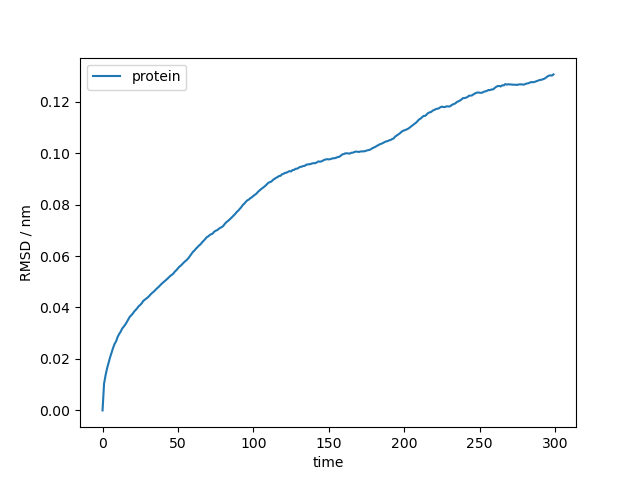

In [10]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_223811'))

In [11]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_4_natural)

Thought: To complete this task, we need to follow several steps. First, we'll download the PDB file for 1LYZ, then set up and run a simulation, analyze the secondary structure, and finally compute the RMSD. Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we have successfully downloaded the PDB file for 1LYZ. Now, let's set up and run a short simulation for 1 picosecond at 300 K.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_223954",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "ewaldErrorTolerance": 0.0005,
            "constraintTolerance": 0.000001
        },
        "integrator_params": {
  

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [12]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_223954: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_223954
 1LYZ_224004: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_224008: Initial positions for simulation sim0_224008
 sim0_224008: Basic Simulation of Protein 1LYZ_224004
 rec0_224008: Simulation trajectory for protein 1LYZ_224004 and simulation sim0_224008
 rec1_224008: Simulation state log for protein 1LYZ_224004 and simulation sim0_224008
 rec2_224008: Simulation pdb frames for protein 1LYZ_224004 and simulation sim0_224008
 rec0_224046: dssp values for trajectory with id: rec2_224008
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_224049: RMSD plot for 1LYZ


In [13]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_223954"))

In [14]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_223954", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [15]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_224008")
top_path_2 = registry_2.get_mapped_path("top_sim0_224008")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

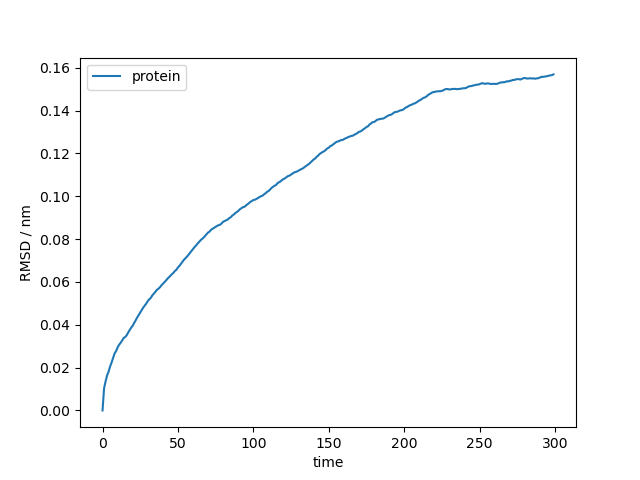

In [16]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_224049'))